# Statistical Theory Final Project Analysis

---

Names of Group Members:

-  Jordan Britton
-  Abigail Finsten
-  Andrew Ebert




# Ground Game Metrics: Statistical Evaluation of Running Backs: When Is the Dropoff?

---

<mark>Enter your project name in the header above.</mark>



##  Instructions

---

Below is a suggested organization for your final analysis. You can organize your final analysis differently if you like, but be sure to you follow the detailed instructions from the Project Analysis instructions posted in Canvas.

1. Introduction
2. Exploratory data analysis
3. Statistical question 1 analysis and conclusion of test
4. Statistical question 2 analysis and conclusion of test
5. Conclusion

<br>

<font color="tomato">Caution: Do not wrangle, edit, manipulate or clean data *secretly* in Excel (or using other software) before uploading into Colab. Load the raw data into Colab, and any data manipulation and/or cleaning should be performed using R code in Colab. If you are unable to perform the necessary manipulations in R, then let me know know how I can help.</font>


## How to Submit?

---

Once completed, each group should upload one copy (per group) of your project analysis as a Google Colab notebook (file extension .ipynb)  in Canvas before <font color="dodgerblue">**11:59PM on Friday, May 3.**</font>

- Only one member of the group needs to submit on behalf of all group members. Please do not have each person in the group submit the work separately.
- If your data is stored in a local file (for example a .csv or .xlsx file) that I have not already received, please be sure to upload in Canvas or email me the data file.

<br>


## <font color="dodgerblue">Let me know if you need help, and **GOOD LUCK!!!**</font>


# Introduction/Background/Structure

---

We decided to analyze the statistics related to NFL running back over the past 20 years which was motivated by our interest in football. Our main focus was to analyze the relationship between age of a running back and success in a given season.

<br> We primarily focused on two running back metrics: yards and fumbles in a given season. Rushing yards can be an indicator for a running back's success in a season, while fumbles is a negative metric when measuring a running back's success in a season. With this we settled on two questions we sought to analyze:

1) Does age affect the amount of rushing yards a running back gains in a season?

2) Are younger running backs more likely to have a fumble?

<br> With these questions we seek to delve into broader questions such as whether younger running backs outperform older running backs, whether age affects fumble rates, when a player should retire based on a performance dropoff in age, and if teams should target a younger or older running back when drafting.

<br> Our data set is in the form of a csv file which is linked below. The file contains data of all rushing statistics of players between the years 2001-2023(so 2001-2002 season all the way to 2023-2024 season). However, because we only wanted to analyze running back metrics, we also have a csv file of running backs in these given years. This is also linked below. From here, we decided to cross reference the running back list with the names in our rushing statistics list; we removed a player from the rushing statistic list if their name wasn't in the running back list.

<br> Our data was imported using the ggplot2 library which has a read.csv() function where we pasted the url of both csv files(located in a shared Google Drive). We removed the first column from our rushing statistics file as this only incremented for each player, which wasn't relevant. Additionally, we decided to change the variable names to something that was easier to interpret. There are 2617 observations in our data following the data cleaning mentioned.



In [ ]:
library(ggplot2)

In [ ]:
data <- read.csv("https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Statistical-Theory/main/Data/Project-24-Spring/rushing.csv")

players_csv <- read.csv("https://drive.google.com/uc?id=1E7yGZToGI6c8Vnau3273rEqkXVvOs8dh")

csv_players <- as.character(players_csv[[1]])

# Check if each player in your dataframe exists in the CSV file
data$In_Other_File <- data$Player %in% csv_players

data <- data[data$In_Other_File, , drop = FALSE]

#Change these to categorical
#data$Year <- factor(data$Year)
#data$Player <- factor(data$Player)
#data$Age <- factor(data$Age)

#Remove ...1 column
data <- data[, -1]

#Changed column names
new_names <- c("Player_Name", "Age", "Games_Played", "Games_Started",
                "Rushing_Attempts", "Rushing_Yards", "Rushing_Touchdowns",
                "Rushing_First_Downs", "Longest_Rush", "Yards_per_Attempt",
                "Yards_per_Game", "Fumbles", "Year")
names(data) <- new_names

data <- subset(data, (Rushing_Yards >= 200 | Games_Played > 10))
#New summary
summary(data)

 Player_Name             Age         Games_Played   Games_Started   
 Length:2617        Min.   :21.00   Min.   : 3.00   Min.   : 0.000  
 Class :character   1st Qu.:24.00   1st Qu.:13.00   1st Qu.: 1.000  
 Mode  :character   Median :26.00   Median :15.00   Median : 4.000  
                    Mean   :26.05   Mean   :14.12   Mean   : 5.818  
                    3rd Qu.:28.00   3rd Qu.:16.00   3rd Qu.:10.000  
                    Max.   :39.00   Max.   :17.00   Max.   :17.000  
 Rushing_Attempts Rushing_Yards  Rushing_Touchdowns Rushing_First_Downs
 Min.   :  1.0    Min.   : -15   Min.   : 0         Min.   :  0.00     
 1st Qu.: 18.0    1st Qu.:  71   1st Qu.: 0         1st Qu.:  5.00     
 Median : 71.0    Median : 293   Median : 2         Median : 15.00     
 Mean   :100.8    Mean   : 426   Mean   : 3         Mean   : 21.88     
 3rd Qu.:165.0    3rd Qu.: 678   3rd Qu.: 5         3rd Qu.: 35.00     
 Max.   :416.0    Max.   :2097   Max.   :28         Max.   :109.00     
  Longest_Rus

In [ ]:
head(data)

,Player_Name,Age,Games_Played,Games_Started,Rushing_Attempts,Rushing_Yards,Rushing_Touchdowns,Rushing_First_Downs,Longest_Rush,Yards_per_Attempt,Yards_per_Game,Fumbles,Year,NA
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<lgl>
1,Stephen Davis,27,16,16,356,1432,5,75,32,4.0,89.5,6,2001,TRUE
2,Corey Dillon,27,16,16,340,1315,10,69,96,3.9,82.2,5,2001,TRUE
3,LaDainian Tomlinson,22,16,16,339,1236,10,68,54,3.6,77.3,8,2001,TRUE
4,Curtis Martin,28,16,16,333,1513,10,78,47,4.5,94.6,2,2001,TRUE
5,Priest Holmes,28,16,16,327,1555,8,81,41,4.8,97.2,4,2001,TRUE
6,Eddie George,28,16,16,315,939,5,40,27,3.0,58.7,8,2001,TRUE


# Exploratory Data Analysis

------------------------------------------------------------------------


From the chart below we can see that there is a drop in performance over time, which is to be expected. However, the most interesting thing is that performance seems to be especially high in the early career, but it stays relatively stable from 24 to 30 years old. Then there is a sudden, dramatic dip in performance from then on. You would expect this to happen much earlier, given the state of the NFL right now and how hard it is for running backs to get second contracts, which should typically happen somewhere around 26-28 years old.

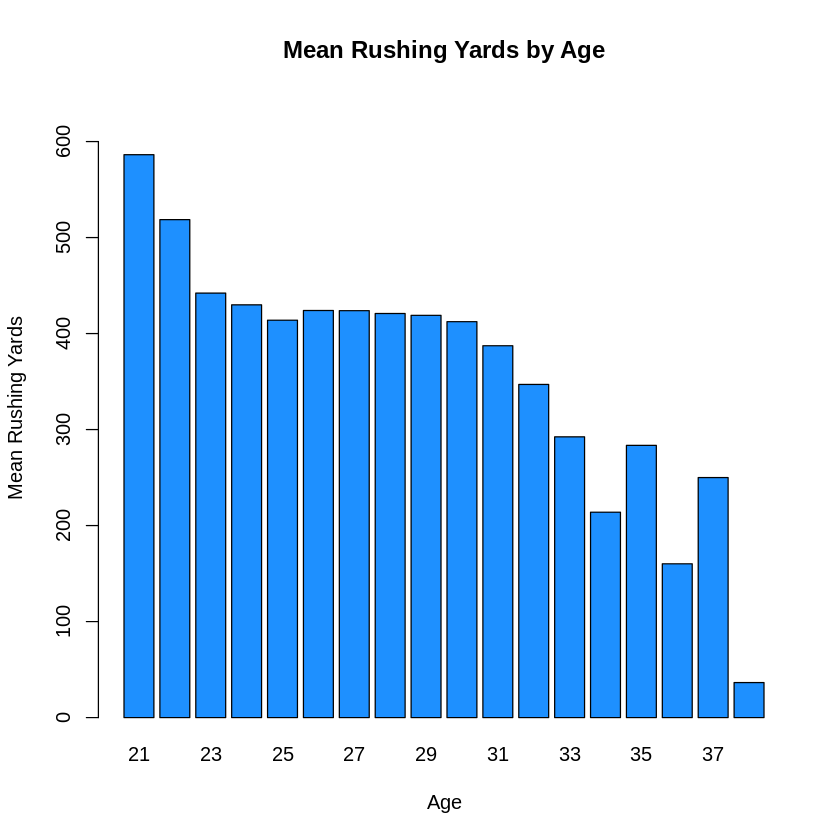

In [ ]:
len <- max(data$Age)-min(data$Age)
result.out <- numeric(len)
labels <- numeric(len)
current = min(data$Age)
for (i in 1:len)
{
  ours <- subset(data, Age == current)
  index <- mean(ours$Rushing_Yards)
  result.out[i] <- index
  labels[i] <- current
  current <- current + 1
}
labels[18] <- 39 # I am too lazy to think through the right way to do this rn
barplot(result.out,
        names.arg = labels,
        main = "Mean Rushing Yards by Age",
        xlab = "Age",
        ylab = "Mean Rushing Yards",
        col = "dodgerblue",
        border = "black",
          # Extend x-axis bounds by 1 unit on both sides
        ylim = c(0, max(result.out) * 1.1))

As we can see from the plot below, players at age 24 have the highest frequency and then as age increses the data creates a tail and is skewed right.

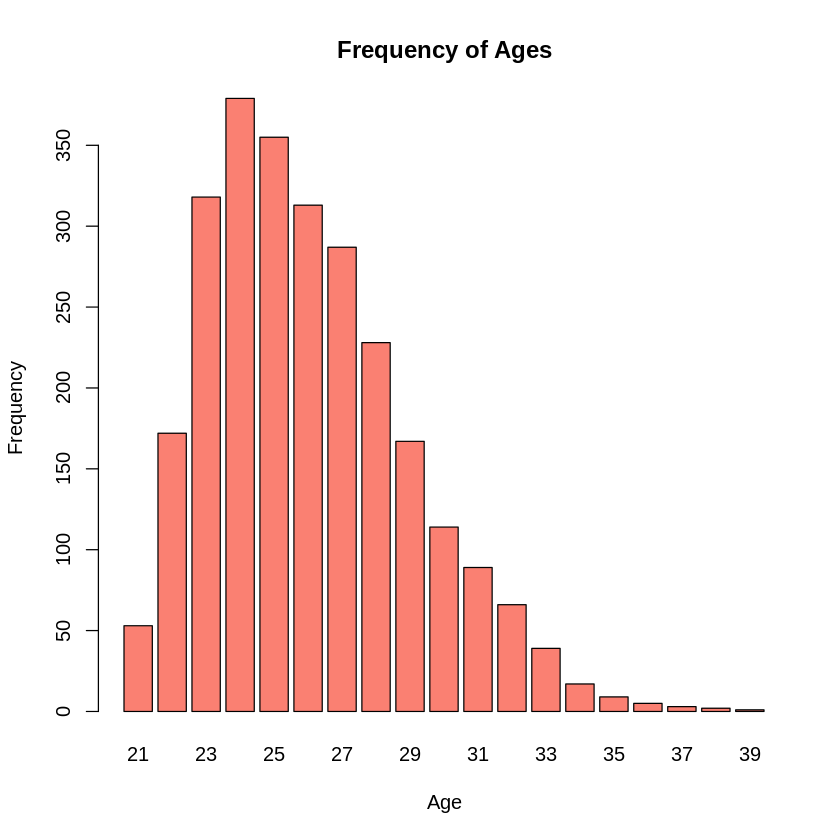

In [ ]:
data$Age <- factor(data$Age)
data.age <- table(data$Age)
barplot(data.age,
        main = "Frequency of Ages",
        xlab = "Age",
        ylab = "Frequency",
        col = "salmon",  # Use a shade of red (salmon)
        border = "black")

# Optionally, you can also display the proportions
#prop <- prop.table(data.age)

This chart describes the distribution of rushing yards per season for all of the players in the dataset each year, by year.  The distribution of rushing yards per season is slightly higher for the under 27 group in each quartile, but side by side they are nearly identical.

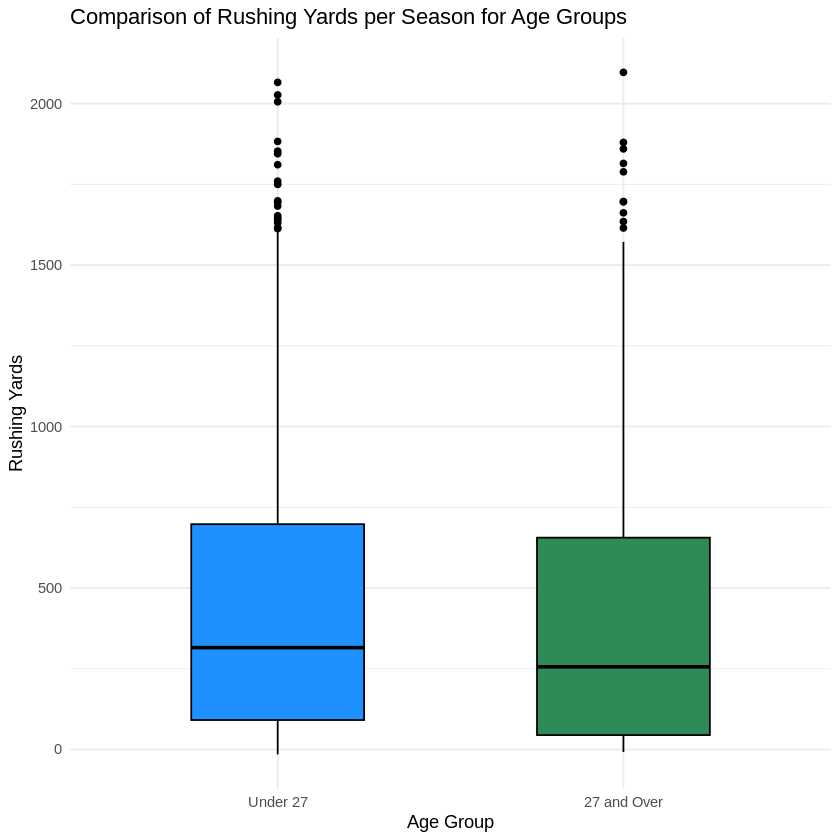

In [ ]:
data$Age <- as.numeric(as.character(data$Age))

data_under_27 <- subset(data, Age < 27)
data_over_27 <- subset(data, Age >= 27)

ggplot(mapping = aes(x = factor(Age >= 27), y = Rushing_Yards)) +
  geom_boxplot(data = data_under_27, fill = "dodgerblue", color = "black", width = 0.5) +
  geom_boxplot(data = data_over_27, fill = "seagreen", color = "black", width = 0.5) +
  labs(title = "Comparison of Rushing Yards per Season for Age Groups",
       x = "Age Group",
       y = "Rushing Yards",
       fill = "Age Group") +
  scale_x_discrete(labels = c("Under 27", "27 and Over")) +
  theme_minimal()

According to the below graph, it appears that running backs typically become more secure with the ball over time. With the exception of those at 35, but it is so unlikely that a running back will make it that long in the NFL, this could just be skewed data.

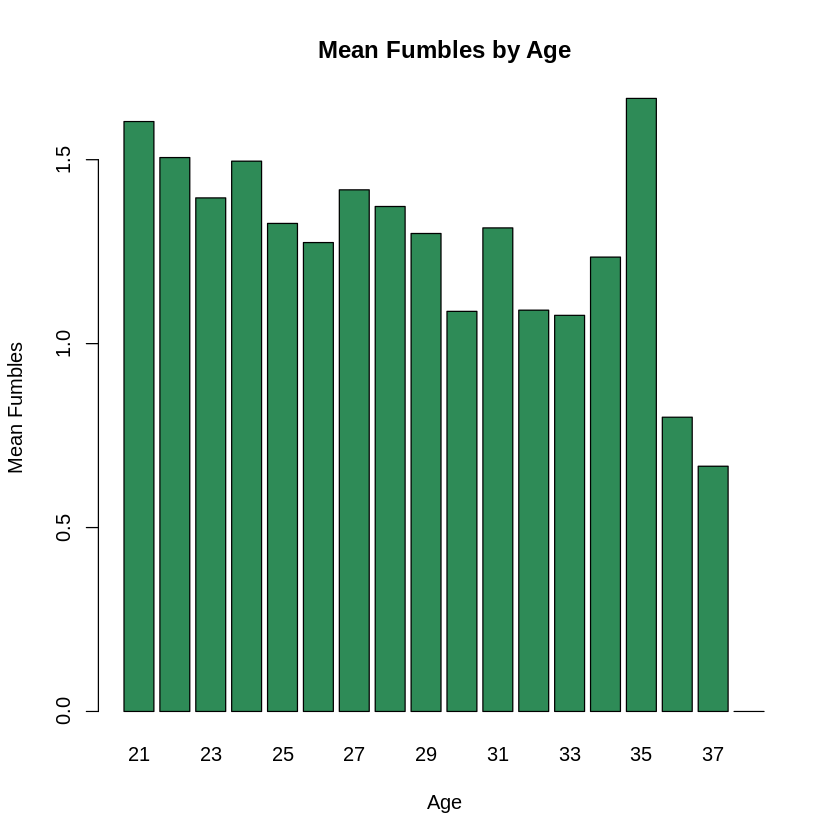

In [ ]:
len <- max(data$Age)-min(data$Age)
result.out <- numeric(len)
labels <- numeric(len)
current = min(data$Age)
for (i in 1:len)
{
  ours <- subset(data, Age == current)
  index <- mean(ours$Fumbles)
  result.out[i] <- index
  labels[i] <- current
  current <- current + 1
}
labels[18] <- 39 # I am too lazy to think through the right way to do this rn
barplot(result.out,
        names.arg = labels,
        main = "Mean Fumbles by Age",
        xlab = "Age",
        ylab = "Mean Fumbles",
        col = "seagreen",  # Use seagreen color
        border = "black")

Based on the plot below we can't say much other than both under 27 players and 27+ players have roughly the same proportion of individuals who had at least one fumble. Under 27 is just over 0.6 for proportion of players who had at least one fumble while 27 and over were just under the proportion of 0.6

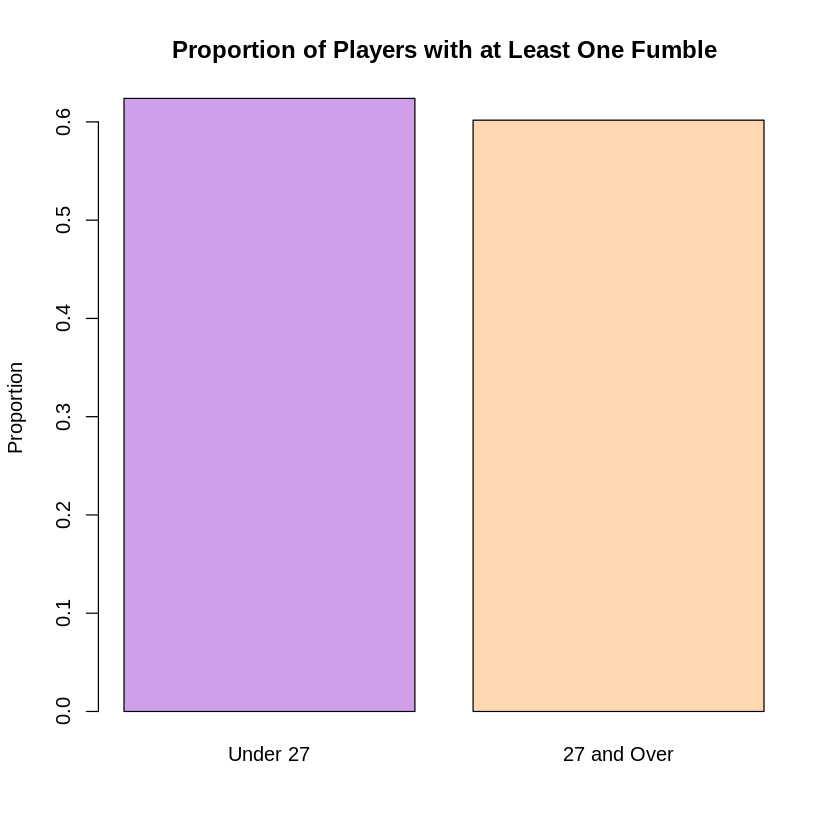

In [ ]:
# Calculate the proportion of players with at least one fumble for each age group
prop_under_27 <- sum(data_under_27$Fumbles > 0) / nrow(data_under_27)
prop_27_and_over <- sum(data_over_27$Fumbles > 0) / nrow(data_over_27)

colors <- c("#CFA0E9", "#FFD8B1")

# Create a bar plot showing the proportions
barplot(c(prop_under_27, prop_27_and_over),
        names.arg = c("Under 27", "27 and Over"),
        main = "Proportion of Players with at Least One Fumble",
        ylab = "Proportion",
        col = colors,  # Use seagreen color
        border = "black")


# Test for a Difference in Two Means

------------------------------------------------------------------------

**Do running backs under 27 have more yards in a season, on average, than running backs 27 and over?**


- $H_0$:  Running backs under 27 rush for as many yards per season on average compared to running backs 27 or older.  $\mu_{under27}=\mu_{27+}$
- $H_a$: Running backs under 27 rush for more yards per season on average compared to running backs 27 or older.
: $\mu_{\text{under27}} > \mu_{\text{27+}}$




In [ ]:
# establishing a function that we can use for both cases
perm_test <- function(y1, y2, n_permutations, kind = "mean", comparator = 60) {
  all_yards <- c(y1, y2)
  obs_diff <- switch(
    kind,
    "mean" = {
    mean(y1) - mean(y2) # do this for difference of 2 means
    },
    mean(y1 > comparator) - mean(y2 > comparator) # proportion test for now
  )
  perm_diffs <- replicate(n_permutations, {
    perm_yards <- sample(all_yards, length(all_yards), replace = FALSE)
    mean(perm_yards[1:length(y1)]) - mean(perm_yards[(length(y1) + 1):length(all_yards)])
  })
  p_value <- mean(perm_diffs >= obs_diff)
  return(list(obs_diff = obs_diff, p_value = p_value, perm_diffs = perm_diffs))
}

## Permutation Test

---



In [ ]:
data$Age <- as.numeric(as.character(data$Age))
yards_under_27 <- data$Rushing_Yards[data$Age < 27]
yards_27_or_older <- data$Rushing_Yards[data$Age >= 27]
obs_diff <- mean(yards_under_27) - mean(yards_27_or_older)

test <- perm_test(yards_under_27, yards_27_or_older, n_permutations = 1000)
test$obs_diff
test$p_value


[1] 42.07203

[1] 0.009

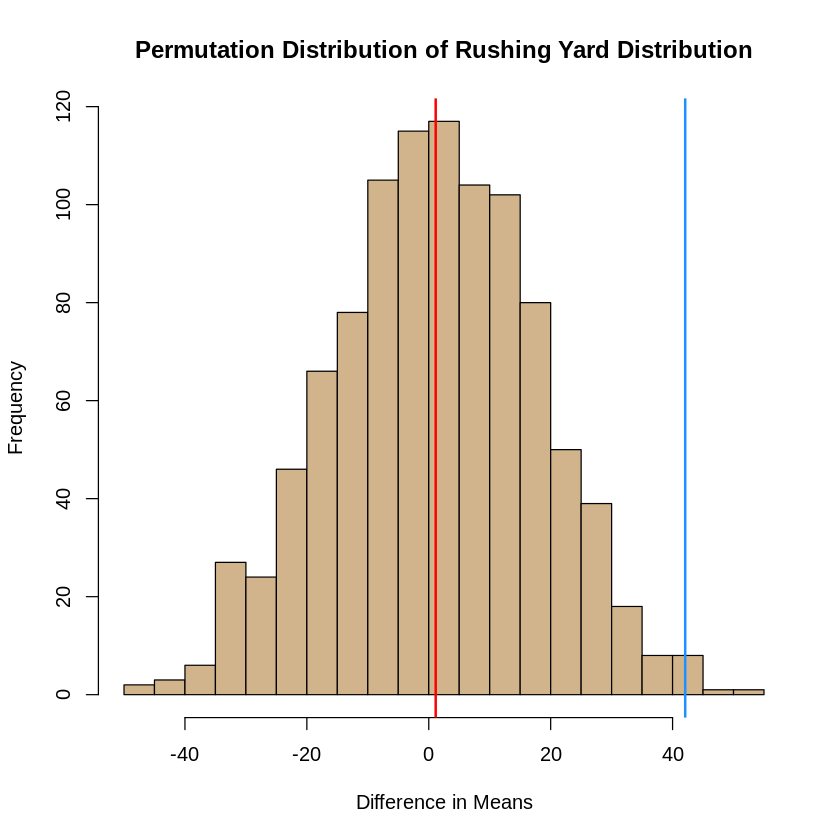

In [ ]:
hist(test$perm_diffs, breaks = 30, xlab = "Difference in Means", col = "tan",
     main = "Permutation Distribution of Rushing Yard Distribution")
abline(v = test$obs_diff, col = "dodgerblue", lwd = 2)  # Add line for observed difference
abline(v = mean(test$perm_diffs), col = "red", lwd = 2)  # Add line for observed difference

## Parametric Test

---


In [ ]:
len.u <- nrow(data_under_27)
len.o <- nrow(data_over_27)

sd.u <- sd(data_under_27$Rushing_Yards)
sd.o <- sd(data_over_27$Rushing_Yards)

se <- sqrt( ( sd.u^2 / len.u ) + ( sd.o^2 / len.o ))
t.ry <- (obs_diff) / se

n.min <- min(len.u, len.o)
pval.some <- pt(t.ry, n.min-1)
2*(1-pval.some) # two-tailed test

[1] 0.01158062

In [ ]:
#data$Age <- as.numeric(as.character(data$Age))
#yards_under_27 <- data$Rushing_Yards[data$Age < 27]
#yards_27_or_older <- data$Rushing_Yards[data$Age >= 27]

t.test(yards_under_27, yards_27_or_older, alt = "two.sided")


	Welch Two Sample t-test

data:  yards_under_27 and yards_27_or_older
t = 2.5292, df = 2184, p-value = 0.0115
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  9.451101 74.692959
sample estimates:
mean of x mean of y 
 442.4654  400.3934 


## Comparison of Results

---

Based on our test results we have reason to reject the null hypothesis, as there is a p-value of 0.01, and consequently we can accept the alternative hypothesis that running backs under 27 have more rushing yards than running backs 27 and over.

# Test for a Difference in Two Proportions

------------------------------------------------------------------------

**Do running backs under 27 have a greater proportion of having a fumble than running backs 27 or older?**


- $H_0$: the proportion of running backs under 27 who have at least one fumble is the same as the proportion of running backs 27 or older who have at least one fumble: $p_{\text{fumble_over_27}} =  p_{\text{fumble_under_27}}$
- $H_a$: the proportion of running backs under 27 who have at least one fumble is greater than the proportion of running backs 27 or older who have at least one fumble: $p_{\text{fumble_over_27}} \neq p_{\text{fumble_under_27}}$






---



## Permutation Test

---

In [ ]:
obs_prop_under_27 <- mean(data$Fumbles[data$Age < 27] > 0)
obs_prop_over_27 <- mean(data$Fumbles[data$Age >= 27] > 0)
obs_diff_prop <- obs_prop_under_27 - obs_prop_over_27
set.seed(123)
num_permutations <- 10000

perm_diff_props <- numeric(num_permutations)
for (i in 1:num_permutations) {
  perm_age <- sample(data$Age)
  perm_prop_under_27 <- mean(data$Fumbles[perm_age < 27] > 0)
  perm_prop_over_27 <- mean(data$Fumbles[perm_age >= 27] > 0)
  perm_diff_props[i] <- perm_prop_under_27 - perm_prop_over_27
}
#fumbles_under_27 <- data$Fumbles[data$Age < 27]
#fumbles_27_or_older <- data$Fumbles[data$Age >= 27]
#perm_test(fumbles_under_27, fumbles_27_or_older, "else", 0)
(sum(perm_diff_props >= obs_diff_prop) + 1) / (num_permutations + 1)

[1] 0.1424858

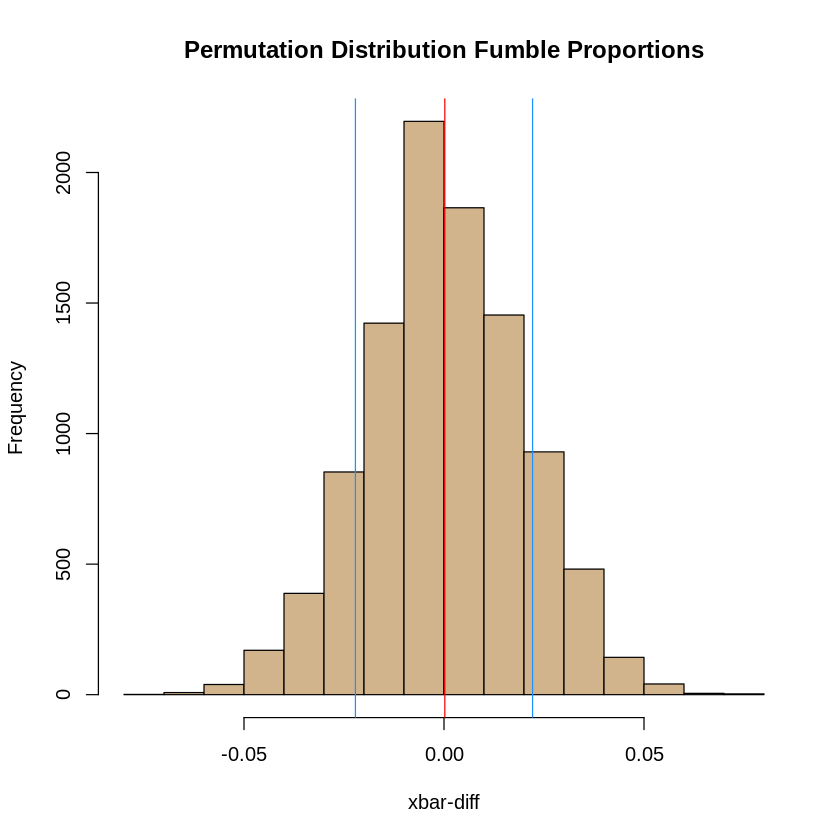

In [ ]:
hist(perm_diff_props,  xlab = "xbar-diff", col = "tan",
     main = "Permutation Distribution Fumble Proportions")
abline(v = obs_diff_prop, col = "dodgerblue")
abline(v = -obs_diff_prop, col = "dodgerblue")
abline(v = mean(perm_diff_props), col = "red")

## Parametric Test

---


In [ ]:
perm_prop_under_27 <- data_under_27$Fumbles
perm_prop_over_27 <- data_over_27$Fumbles

fumblers.young <- sum(perm_prop_under_27 > 0)
fumblers.old <- sum(perm_prop_over_27 > 0)


under.len <- length(perm_prop_under_27)
over.len <- length(perm_prop_over_27)

p.pooled <- (fumblers.young + fumblers.old) / (under.len + over.len)
se <- sqrt( p.pooled * (1 - p.pooled) * (1 / under.len + 1 / over.len))
#p.pooled
#se

obs_diff.this <- (fumblers.young / under.len) - (fumblers.old / over.len)

z <- (obs_diff.this - 0) / se

pval <- pnorm(-1*abs(z), 0, 1) # this is a 2-tailed test
2*pval

[1] 0.2555313

In [ ]:
prop.test(c(fumblers.young, fumblers.old), c(under.len, over.len), correct = FALSE)


	2-sample test for equality of proportions without continuity correction

data:  c(fumblers.young, fumblers.old) out of c(under.len, over.len)
X-squared = 1.2928, df = 1, p-value = 0.2555
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01610646  0.06039985
sample estimates:
   prop 1    prop 2 
0.6238994 0.6017527 


## Comparison of Results

---


In both tests, we receive p-values greater than 0.10, so our p-value would be considered non-significant with any of the usual p-tests we could use. Based on these results, it seems we cannot reject $H_0$  and therefore the test is inconclusive.

# Conclusion

---
From our charts tests we are able to make some conclusions about rushing yards per season and fumbles, focused around running backs in different age groups.  Our bar gaph leads us to the conclusion that players ages are lightly skewed to the right with the most concentrated ages being 24 and 25.  The distribution of rushing yards per season is more heavily skewed to the right, a lot of variation in the data, ranging from 0 to 2250.  This is most likely the case because not all rushing backs get many rush attempts per season.  
<br>
When compairing rushing yards per season between the under 27 and over 27 age groups, the box plots show slight differences in distributions but nothing significant at first glance.  With testing significant differences were revealed.  Our parametric and permutation tests for a difference in mean rushing yards for the two groups resulted in significant P-values at the 0.05 level. This gives us reason to believe that there is a significant difference in rushing yards per season between age groups and shows that there may be a decline in performance in this category as players age.

<br>
The proportion test to compare age groups and fumbles did not return a significant result.  We were not able to find evidence that there is a significant difference between proportion of players with at least one fumble between age groups.

<br>
By studying data related to age and player performance we can draw conclusions about what the ideal age is for a football player to be most effective.  Some performance statistics will be comparitively better for younger players while others may improve with experience and be comparitively better for older players.  Studying these statistics in more detail could give more in-depth insight to optimal age for football players.

<br>




# Feedback and Rubric:

---

| Topic | Possible | Deduction |
|-------|----------|--------|
| Setting up Hypotheses | 2| |
| Exploratory Data Analysis |  4 | |
| Hypothesis Test for Difference in Means  | 6 |  |
| Hypothesis Test for Difference in Proportions  | 6 |  |
| Organization and overal quality  |  2 |  |

<br>

## Total Earned:  / 20
